In [1]:
import pickle

src_path = "D:/Research files/Nose kohsaka lab/Soft robotics/Design/Matlab/Neuromechanical model/MyModel/LarvalLocomotion/"
dst_path = "D:/Research files/Nose kohsaka lab/Soft robotics/Design/Matlab/Neuromechanical model/MyModel/LarvalLocomotion/"

# 20 points = the anterior edges of T3, and A1-A9
src_name = ["Results1-54-109-20.csv", "Results2-125-215-20.csv", "Results3-1-74-20.csv", "Results4-248-370-20.csv",
            "Results5-1-100-20.csv", "Results6-380-485-20.csv", "Results7-250-310-20.csv", "Results8-1-105-20.csv",
            "Results9-464-555-20.csv", "Results10-665-733-20.csv", "Results11-249-315-20.csv"]

with open(src_path + "pickle/disp_abs_all_201102.pickle", "rb") as f:
    disp_abs_all = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/pickle/disp_abs_all_201102.pickle'

In [3]:
print("len(disp_abs_all):", len(disp_abs_all))
print("disp_abs_all[0].shape:", disp_abs_all[0].shape)

len(disp_abs_all): 11
disp_abs_all[0].shape: (10, 56, 2)


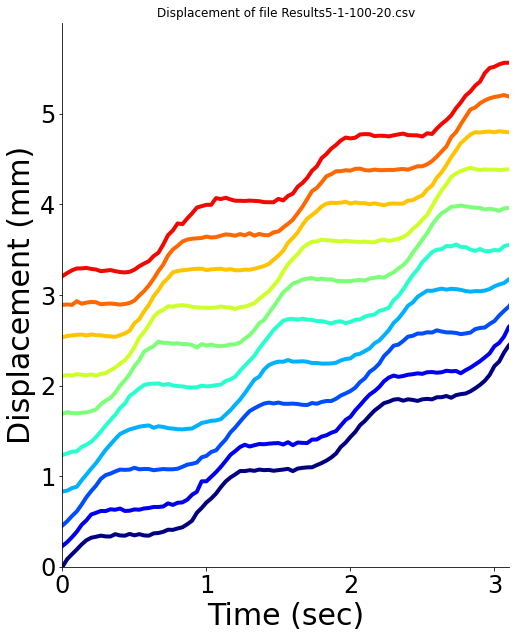

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

file_id = 4

plt.figure(0, figsize=(8,10))
for seg in range(10):
    plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color=cm.jet(seg/10), linewidth=4,
            label="x{}".format(9-seg))
    
plt.title("Displacement of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)", fontsize=30)
plt.ylabel("Displacement (mm)", fontsize=30)
plt.xlim([0,3.1])
plt.ylim([0,6])
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3,4,5])
plt.tick_params(labelsize=24)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend()
plt.savefig(dst_path + "Displacement_trace_201119_1.png", facecolor="white", bbox_inches = "tight")
#plt.show()

In [28]:
for seg in range(10):
    print("y{0}: {1}".format(seg, [int(elm*255) for elm in cm.jet((9-seg)/10)]))
#y3 は暗いので、20ずつ引いた

y0: [241, 7, 0, 255]
y1: [255, 103, 0, 255]
y2: [255, 196, 0, 255]
y3: [205, 255, 41, 255]
y4: [124, 255, 121, 255]
y5: [41, 255, 205, 255]
y6: [0, 176, 255, 255]
y7: [0, 76, 255, 255]
y8: [0, 0, 241, 255]
y9: [0, 0, 127, 255]


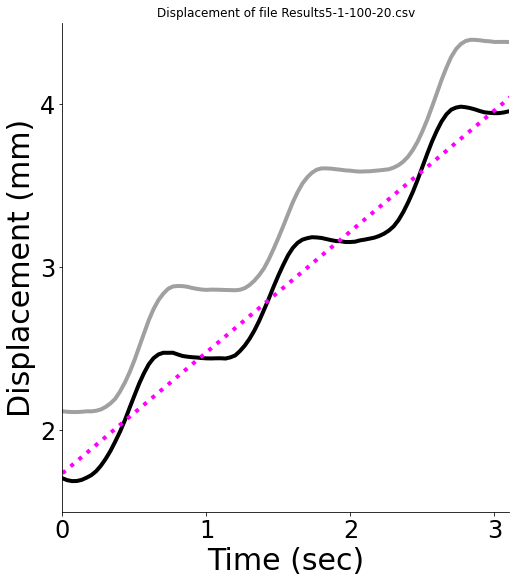

In [31]:
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.linear_model import LinearRegression

file_id = 4
seg0 = 5
seg1 = 6

X = disp_abs_all[file_id][seg0,:,0].reshape(-1,1)
trace0 = signal.savgol_filter(disp_abs_all[file_id][seg0,:,1], 11, 2).reshape(-1,1)
trace1 = signal.savgol_filter(disp_abs_all[file_id][seg1,:,1], 11, 2)

lr = LinearRegression()
lr.fit(X, trace0)

plt.figure(0, figsize=(8,9))
plt.plot(disp_abs_all[file_id][seg0,:,0], trace0, linewidth=4, color="#000000")
plt.plot(disp_abs_all[file_id][seg1,:,0], trace1, linewidth=4, color="#a0a0a0")
plt.plot(X, lr.predict(X), linewidth=4, color="#FF00FF", linestyle="dotted")

plt.title("Displacement of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)", fontsize=30)
plt.ylabel("Displacement (mm)", fontsize=30)
plt.xlim([0,3.1])
plt.ylim([1.5,4.5])
plt.xticks([0,1,2,3])
plt.yticks([2,3,4])
plt.tick_params(labelsize=24)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig(dst_path + "Trace_plot_201120_1.png", facecolor="white", bbox_inches = "tight")
#plt.show()



In [46]:
with open(src_path + "pickle/seg_len_all_201102.pickle", "rb") as f:
    seg_len_all = pickle.load(f)
print("len(seg_len_all)", len(seg_len_all))
print("seg_len_all[0].shape", seg_len_all[0].shape)

len(seg_len_all) 11
seg_len_all[0].shape (9, 56, 2)


In [36]:
import copy
from scipy import signal

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)

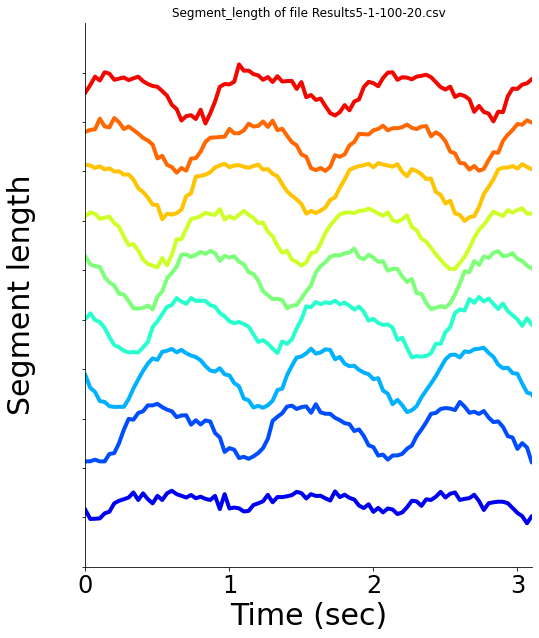

In [54]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

file_id = 4

plt.figure(0, figsize=(8,10))
for seg in range(9):
    X = seg_len_all[file_id][seg,:len(diff),0]
    Y = seg_len_all[file_id][seg,:len(diff),1]
    plt.plot(X, Y+seg*0.2, color=cm.jet((seg+1)/10), linewidth=4,
            label="x{}".format(8-seg))
    
plt.title("Segment_length of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)", fontsize=30)
plt.ylabel("Segment length", fontsize=30)
plt.xlim([0,3.1])
plt.ylim([0,2.2])
plt.xticks([0,1,2,3])
plt.yticks([0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0], color="white")
plt.tick_params(labelsize=24)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend()
plt.savefig(dst_path + "Segment_length_201120_1.png", facecolor="white", bbox_inches = "tight")
plt.show()

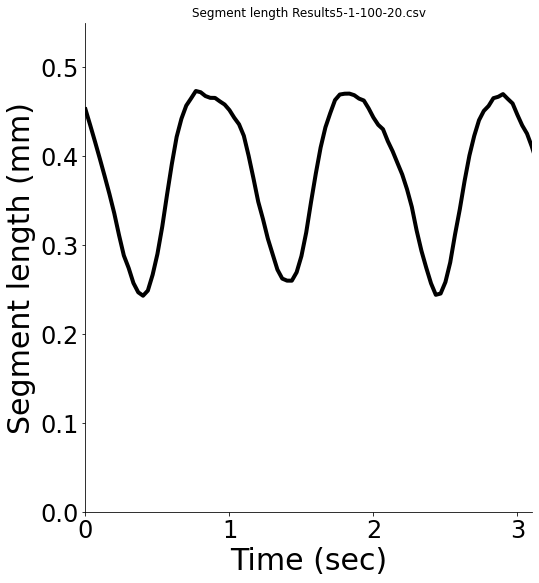

In [62]:
import matplotlib.pyplot as plt
from scipy import signal
#from sklearn.linear_model import LinearRegression

dst_path = "C:/Users/h1006/Documents/Research/Sun/Images/"

file_id = 4
seg0 = 4

X = seg_len_all[file_id][seg0,:,0]
trace0 = signal.savgol_filter(seg_len_all[file_id][seg0,:,1], 11, 2)

plt.figure(0, figsize=(8,9))
plt.plot(X, trace0, linewidth=4, color="#000000")

plt.title("Segment length {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)", fontsize=30)
plt.ylabel("Segment length (mm)", fontsize=30)
plt.xlim([0,3.1])
plt.ylim([0.0,0.55])
plt.xticks([0,1,2,3])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
plt.tick_params(labelsize=24)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.savefig(dst_path + "Segment_length_trace_plot_201120_1.png", facecolor="white", bbox_inches = "tight")
#plt.show()
